In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from ngboost import NormalNGBoost

def true_function(X):
    return np.sin(3*X)

def noise(X):
    return np.random.normal(0, X/2)

n_samples = 300
X = np.random.uniform(0, 2, n_samples).reshape(-1, 1)
y = true_function(X) + noise(X)
y = y.reshape(-1)

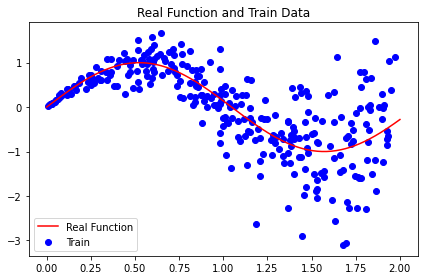

In [50]:
xx = np.linspace(0, 2, 300)
plt.scatter(X,y, c='b', label='Train')
plt.plot(xx, true_function(xx), c='r', label='Real Function')
plt.title("Real Function and Train Data")
plt.legend()
plt.tight_layout()
plt.show()

In [43]:
ngboost = NormalNGBoost(n_learner=1000, learning_rate=1e-2)
ngboost.fit(X, y)

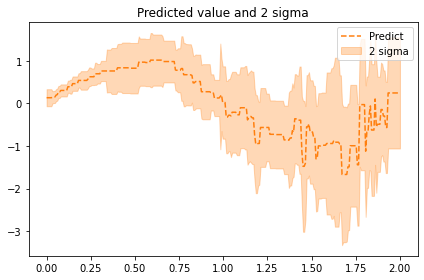

In [52]:
result = ngboost.predict(xx.reshape(-1,1))
plt.plot(xx, result[0], color='C1', linestyle='dashed', label='Predict')
plt.fill_between(xx, result[0]-2*result[1], result[0]+2*result[1], color='C1', alpha=0.3, label='2 sigma')
plt.title("Predicted value and 2 sigma")
plt.legend()
plt.tight_layout()
plt.show()